## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
#mousedata_df = mouse_metadata.drop_duplicates('Mouse ID')
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on= 'Mouse ID', how= 'left')


# Display the data table for preview
mouse_study.round(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.15,2
1889,z969,Naftisol,Male,9,30,30,65.84,3
1890,z969,Naftisol,Male,9,30,35,69.18,4
1891,z969,Naftisol,Male,9,30,40,70.31,4


In [2]:
# Checking the number of mice.

mice = len(mouse_study["Mouse ID"].unique())

Total_mice = pd.DataFrame({"Total Mice": [mice]})

Total_mice

,Total Mice
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mice = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID','Timepoint']), 'Mouse ID'].unique()

dup_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


g989_df = mouse_study.loc[mouse_study["Mouse ID"] == "g989", :]

g989_df.round(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.00,0
909,g989,Propriva,Female,21,26,0,45.00,0
910,g989,Propriva,Female,21,26,5,48.79,0
911,g989,Propriva,Female,21,26,5,47.57,0
912,g989,Propriva,Female,21,26,10,51.75,0
913,g989,Propriva,Female,21,26,10,49.88,0
914,g989,Propriva,Female,21,26,15,51.33,1
915,g989,Propriva,Female,21,26,15,53.44,0
916,g989,Propriva,Female,21,26,20,55.33,1
917,g989,Propriva,Female,21,26,20,54.66,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = mouse_study[mouse_study["Mouse ID"].isin(dup_mice)==False]

clean_data.round(2)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.15,2
1889,z969,Naftisol,Male,9,30,30,65.84,3
1890,z969,Naftisol,Male,9,30,35,69.18,4
1891,z969,Naftisol,Male,9,30,40,70.31,4


In [6]:
# Checking the number of mice in the clean DataFrame.

clean_df = len(clean_data["Mouse ID"].unique())

total_clean = pd.DataFrame({"Total Mice": [clean_df]})

total_clean

,Total Mice
0,248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stats = pd.DataFrame(mouse_study.groupby("Drug Regimen").count())


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

summary_stats["Mean"] = pd.DataFrame(mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())

summary_stats["Median"] = pd.DataFrame(mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())

summary_stats["Standard Deviation"] = pd.DataFrame(mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())

summary_stats["Variance"] = pd.DataFrame(mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())

summary_stats["SEM"] = pd.DataFrame(mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())


# Assemble the resulting series into a single summary dataframe
 

summary_stats = summary_stats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]


summary_stats.round(2)


,Mouse ID,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.68,41.56,4.99,24.95,0.33
Ceftamin,178,52.59,51.78,6.27,39.29,0.47
Infubinol,178,52.88,51.82,6.57,43.13,0.49
Ketapril,188,55.24,53.70,8.28,68.55,0.60
Naftisol,186,54.33,52.51,8.13,66.17,0.60
Placebo,181,54.03,52.29,7.82,61.17,0.58
Propriva,161,52.32,50.85,6.51,42.35,0.51
Ramicane,228,40.22,40.67,4.85,23.49,0.32
Stelasyn,181,54.23,52.43,7.71,59.45,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats.describe

# Using the aggregation method, produce the same summary statistics in a single line

summary_statdrug = mouse_study.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

summary_statdrug.round(2)

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.85  42.35  6.51  0.51
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

Text(0.5, 1.0, 'Drug Totals')

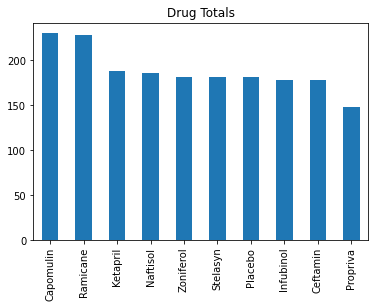

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_total = clean_data["Drug Regimen"].value_counts()

drug_total.plot(kind="bar")

plt.title("Drug Totals")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

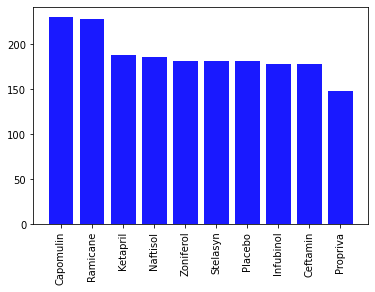

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(drug_total.index, drug_total, color='b', alpha=0.9, align="center")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Mice Gender')

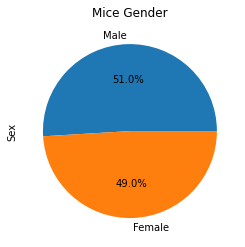

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_mf = clean_data["Sex"].value_counts()

mice_mf.plot(kind="pie", autopct="%1.1f%%")

plt.title("Mice Gender")

Text(0.5, 1.0, 'Mice Gender')

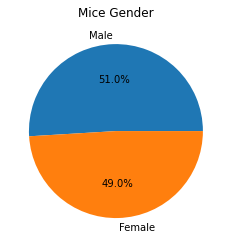

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_mf, labels=mice_mf.index,autopct="%1.1f%%")

plt.title("Mice Gender")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftami

drug_choice = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_test = clean_data.loc[clean_data["Drug Regimen"].isin(drug_choice)]

# Start by getting the last (greatest) timepoint for each mouse
timepoint_df = drug_test.groupby(drug_test["Mouse ID"]).agg({"Timepoint":["max"]})
timepoint_df.columns = ["Timepoint"]


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_df = timepoint_df.reset_index()
drug_time = pd.merge(timepoint_df, clean_data, how="left", on=["Mouse ID", "Timepoint"])

               
drug_time

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_lst = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    tumor_vol_df = drug_time["Tumor Volume (mm3)"].loc[drug_time["Drug Regimen"] == drug]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
 
    
    # add subset 
    
    tumor_vol_lst.append(tumor_vol_df)
   
    # Determine outliers using upper and lower bounds
    
    quartiles = tumor_vol_df.quantile([.25,.5,.75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    iqr = upper-lower
    print(f'For {drug}, Interquartile Range (IQR) is {iqr}')
    lower_bound = lower - (1.5*iqr)
    upper_bound = upper + (1.5*iqr)
    print(f'For {drug}, values below {lower_bound} could be outliers')
    print(f'For {drug}, values above {upper_bound} could be outliers\n')

For Capomulin, Interquartile Range (IQR) is 7.781863460000004
For Capomulin, values below 20.70456164999999 could be outliers
For Capomulin, values above 51.83201549 could be outliers

For Ramicane, Interquartile Range (IQR) is 9.098536719999998
For Ramicane, values below 17.912664470000003 could be outliers
For Ramicane, values above 54.30681135 could be outliers

For Infubinol, Interquartile Range (IQR) is 11.477135160000003
For Infubinol, values below 36.83290494999999 could be outliers
For Infubinol, values above 82.74144559000001 could be outliers

For Ceftamin, Interquartile Range (IQR) is 15.577752179999997
For Ceftamin, values below 25.355449580000002 could be outliers
For Ceftamin, values above 87.66645829999999 could be outliers



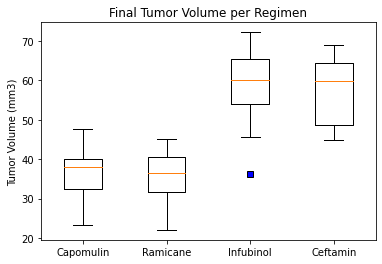

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

colors = dict(markerfacecolor="b", marker='s')


fig, ax = plt.subplots()
ax.set_title("Final Tumor Volume per Regimen")
ax.set_xticklabels(drug_list)
ax.set_ylabel("Tumor Volume (mm3)")
ax.boxplot(tumor_vol_lst, flierprops=colors)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Avgerage Tumor Volume')

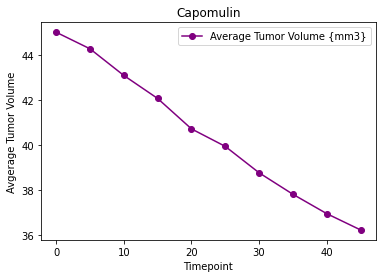

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

tumorline_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"].groupby(clean_data["Timepoint"]).agg({"Tumor Volume (mm3)":["mean"]})
tumorline_data.columns = ["Average Tumor Volume {mm3}"]

ax = tumorline_data.plot(kind="line", title="Capomulin", marker="o", color="purple")
ax.set_ylabel("Avgerage Tumor Volume")

,Average Tumor Volume {mm3},Average Mouse Weight (g)
Timepoint,,
0,45.00,20.12
5,44.27,20.12
10,43.08,20.12
15,42.06,20.00
20,40.72,19.78
25,39.94,19.91
30,38.77,19.91
35,37.82,19.91
40,36.96,19.86


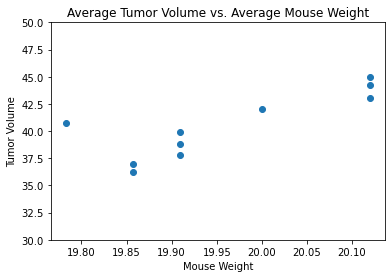

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_vol_wei = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"].groupby(clean_data["Timepoint"]).agg({"Tumor Volume (mm3)":["mean"], "Weight (g)":["mean"]})
avg_vol_wei.columns = ["Average Tumor Volume {mm3}", "Average Mouse Weight (g)"]

atvol = avg_vol_wei["Average Tumor Volume {mm3}"]
amweight = avg_vol_wei["Average Mouse Weight (g)"]
plt.scatter(amweight,atvol)
plt.title("Average Tumor Volume vs. Average Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.ylim(30,50)

avg_vol_wei.round(2)

## Correlation and Regression

In [18]:
correlation = st.pearsonr(atvol,amweight)
print(f"The correlation between Average Tumor Volume and Mouse Weight is {round(correlation[0],3)}")

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(amweight,atvol)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression equation is {line_eq}")

The correlation between Average Tumor Volume and Mouse Weight is 0.821
The linear regression equation is y = 20.29x + -364.52
